In [1]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('/kaggle/input/seizure-dataset/szdata.csv')
df = pd.DataFrame(data)
df

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,Target
0,1.583668e+09,7.311602,-28.998363,-55.994954,62.481546,-62.665309,0.332887,48.305214,35.339849,1
1,1.583668e+09,7.057167,-28.998363,-55.994954,62.455042,-63.849821,0.332887,48.305214,35.339849,1
2,1.583668e+09,7.194986,-28.998363,-55.994954,62.470944,-64.343368,0.332887,48.305214,35.339849,1
3,1.583668e+09,7.444120,-28.998363,-55.994954,62.497448,-64.047240,0.332887,48.303558,35.339849,1
4,1.583668e+09,7.698555,-28.998363,-55.994954,62.529252,-62.566599,0.332887,48.303558,35.339849,1
...,...,...,...,...,...,...,...,...,...,...
921595,1.583807e+09,28.403681,-27.068579,37.929114,53.571602,304.373979,0.100176,89.972695,32.179991,0
921596,1.583807e+09,27.158007,-29.321395,35.676299,52.569762,297.347952,0.101434,89.972695,32.179991,0
921597,1.583807e+09,25.907032,-31.568909,33.428784,51.774651,290.891602,0.102692,89.974904,32.179991,0
921598,1.583807e+09,24.656057,-33.821724,31.175969,51.186269,285.194823,0.103881,89.974904,32.179991,0


In [16]:
columns_to_drop = ['utc_timestamp','acc_x','acc_y','acc_z']
df.drop(columns_to_drop, axis=1, inplace=True)

In [17]:
x = df.iloc[:,0:5]
y = df.iloc[:,-1]

In [18]:
x

,acc_mag,bvp,eda,hr,temp
0,62.481546,-62.665309,0.332887,48.305214,35.339849
1,62.455042,-63.849821,0.332887,48.305214,35.339849
2,62.470944,-64.343368,0.332887,48.305214,35.339849
3,62.497448,-64.047240,0.332887,48.303558,35.339849
4,62.529252,-62.566599,0.332887,48.303558,35.339849
...,...,...,...,...,...
921595,53.571602,304.373979,0.100176,89.972695,32.179991
921596,52.569762,297.347952,0.101434,89.972695,32.179991
921597,51.774651,290.891602,0.102692,89.974904,32.179991
921598,51.186269,285.194823,0.103881,89.974904,32.179991


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=15)

# FFNN

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[5]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=25,
    min_delta=0.001,
    restore_best_weights=True,
)

In [78]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=52,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
14179/14179 [==============================] - 31s 2ms/step - loss: 0.2828 - binary_accuracy: 0.8997 - val_loss: 0.2735 - val_binary_accuracy: 0.9000
Epoch 2/50
14179/14179 [==============================] - 31s 2ms/step - loss: 0.2824 - binary_accuracy: 0.8995 - val_loss: 0.2714 - val_binary_accuracy: 0.8998
Epoch 3/50
14179/14179 [==============================] - 31s 2ms/step - loss: 0.2821 - binary_accuracy: 0.8997 - val_loss: 0.2729 - val_binary_accuracy: 0.9037
Epoch 4/50
14179/14179 [==============================] - 31s 2ms/step - loss: 0.2818 - binary_accuracy: 0.8997 - val_loss: 0.2720 - val_binary_accuracy: 0.9034
Epoch 5/50
14179/14179 [==============================] - 31s 2ms/step - loss: 0.2817 - binary_accuracy: 0.8998 - val_loss: 0.2749 - val_binary_accuracy: 0.9033
Epoch 6/50
14179/14179 [==============================] - 30s 2ms/step - loss: 0.2808 - binary_accuracy: 0.9002 - val_loss: 0.2979 - val_binary_accuracy: 0.8842
Epoch 7/50
14179/14179 [==========

Best Validation Loss: 0.2625
Best Validation Accuracy: 0.9123


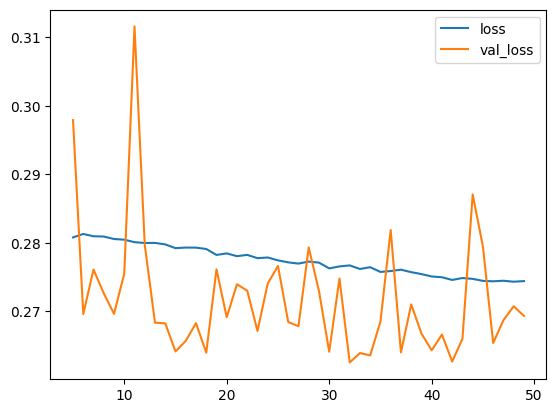

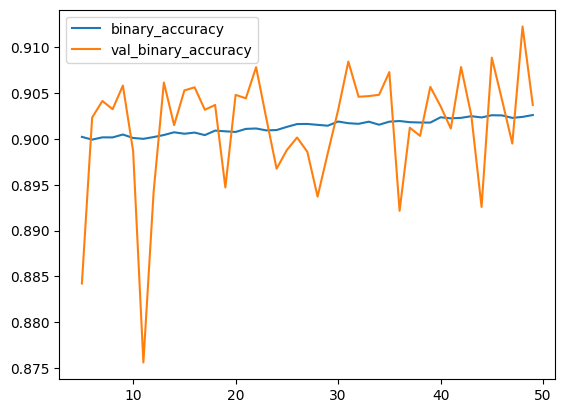

In [79]:
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [80]:
y_pred1 = model.predict(x_valid)
y_pred_binary = np.round(y_pred1) 

5760/5760 [==============================] - 7s 1ms/step


In [81]:
y_pred1

array([[9.6888041e-01],
       [2.0536137e-01],
       [3.6513378e-05],
       ...,
       [4.1032798e-04],
       [9.7846930e-07],
       [2.5062199e-04]], dtype=float32)

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [83]:
precision1 = precision_score(y_valid, y_pred_binary)
recall1 = recall_score(y_valid, y_pred_binary)
f11 = f1_score(y_valid, y_pred_binary)

print(f'Precision: {precision1:.4f}')
print(f'Recall: {recall1:.4f}')
print(f'F1 Score: {f11:.4f}')

Precision: 0.8677
Recall: 0.9525
F1 Score: 0.9081


# MLP

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(9,8),
                    random_state=15,
                    verbose=True,
                    learning_rate_init=0.01)

mlp.fit(x_train,y_train)

Iteration 1, loss = 0.40982304
Iteration 2, loss = 0.35594684
Iteration 3, loss = 0.34368452
Iteration 4, loss = 0.32515382
Iteration 5, loss = 0.34776146
Iteration 6, loss = 0.23777572
Iteration 7, loss = 0.21228189
Iteration 8, loss = 0.20793669
Iteration 9, loss = 0.19336774
Iteration 10, loss = 0.18728983
Iteration 11, loss = 0.18155477
Iteration 12, loss = 0.17918666
Iteration 13, loss = 0.17300258
Iteration 14, loss = 0.17203139
Iteration 15, loss = 0.17063706
Iteration 16, loss = 0.16954005
Iteration 17, loss = 0.16468900
Iteration 18, loss = 0.16597396
Iteration 19, loss = 0.16518452
Iteration 20, loss = 0.16369151
Iteration 21, loss = 0.16052343
Iteration 22, loss = 0.15969614
Iteration 23, loss = 0.15945102
Iteration 24, loss = 0.15837316
Iteration 25, loss = 0.15711204
Iteration 26, loss = 0.15760247
Iteration 27, loss = 0.15606463
Iteration 28, loss = 0.15517599
Iteration 29, loss = 0.15437091
Iteration 30, loss = 0.15224976
Iteration 31, loss = 0.15191404
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(9, 8), learning_rate_init=0.01,
              random_state=15, verbose=True)

In [32]:
ypred2=mlp.predict(x_valid)


from sklearn.metrics import classification_report

classification_report(y_valid,ypred2)

'              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.96     92248\n           1       0.95      0.98      0.96     92072\n\n    accuracy                           0.96    184320\n   macro avg       0.96      0.96      0.96    184320\nweighted avg       0.96      0.96      0.96    184320\n'

In [87]:
print(accuracy_score(y_valid,ypred2))
print(precision_score(y_valid,ypred2))
print(recall_score(y_valid,ypred2))
print(f1_score(y_valid,ypred2))

0.9637966579861111
0.9488117386140279
0.9804174993483361
0.9643557269604885


# RNN

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
seq_length = 5
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(seq_length, 1), return_sequences=True))
model_rnn.add(Dropout(0.2)) 
model_rnn.add(SimpleRNN(32, return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))  
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid')) 

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 5, 64)             4224      
                                                                 
 dropout_3 (Dropout)         (None, 5, 64)             0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 5, 32)             3104      
                                                                 
 dropout_4 (Dropout)         (None, 5, 32)             0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [100]:
history_1 = model_rnn.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=52,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
14179/14179 [==============================] - 104s 7ms/step - loss: 0.2943 - accuracy: 0.8780 - val_loss: 0.1601 - val_accuracy: 0.9463
Epoch 2/50
14179/14179 [==============================] - 103s 7ms/step - loss: 0.1486 - accuracy: 0.9468 - val_loss: 0.0967 - val_accuracy: 0.9616
Epoch 3/50
14179/14179 [==============================] - 105s 7ms/step - loss: 0.1170 - accuracy: 0.9546 - val_loss: 0.1486 - val_accuracy: 0.9347
Epoch 4/50
14179/14179 [==============================] - 103s 7ms/step - loss: 0.1050 - accuracy: 0.9592 - val_loss: 0.0674 - val_accuracy: 0.9726
Epoch 5/50
14179/14179 [==============================] - 101s 7ms/step - loss: 0.1024 - accuracy: 0.9605 - val_loss: 0.1048 - val_accuracy: 0.9611
Epoch 6/50
14179/14179 [==============================] - 100s 7ms/step - loss: 0.0967 - accuracy: 0.9631 - val_loss: 0.0644 - val_accuracy: 0.9755
Epoch 7/50
14179/14179 [==============================] - 100s 7ms/step - loss: 0.0960 - accuracy: 0.9641 - val_

Best Validation Loss: 0.0531
Best Validation Accuracy: 0.9807


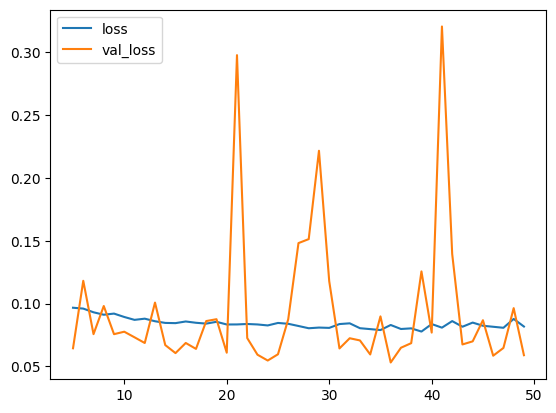

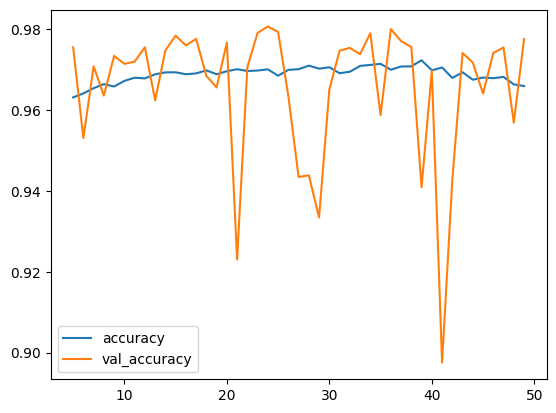

In [101]:
history_df_1 = pd.DataFrame(history_1.history)
# Start the plot at epoch 5
history_df_1.loc[5:, ['loss', 'val_loss']].plot()
history_df_1.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df_1['val_loss'].min(),
              history_df_1['val_accuracy'].max()))

In [102]:
y_pred2 = model_rnn.predict(x_valid)
y_pred_binary2 = np.round(y_pred2) 

5760/5760 [==============================] - 14s 2ms/step


In [103]:
precision2 = precision_score(y_valid, y_pred_binary2)
recall2 = recall_score(y_valid, y_pred_binary2)
f12 = f1_score(y_valid, y_pred_binary2)

print(f'Precision: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')
print(f'F1 Score: {f12:.4f}')

Precision: 0.9758
Recall: 0.9794
F1 Score: 0.9776


In [104]:
acc2 = accuracy_score(y_valid, y_pred_binary2)
print(f'Accuracy: {acc2:.4f}')

Accuracy: 0.9776


# XGBoost

In [38]:
import xgboost as xgb

In [39]:
hyperparameters = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
}

In [40]:
modelx = xgb.XGBClassifier(**hyperparameters)
modelx.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_predx = model.predict(x_valid)

5760/5760 [==============================] - 7s 1ms/step


In [42]:
y_predx

array([[9.5363170e-01],
       [1.5270543e-01],
       [5.1362906e-05],
       ...,
       [5.2091212e-04],
       [1.4453869e-06],
       [3.2680292e-04]], dtype=float32)

In [43]:
threshold = 0.5  

y_pred_binaryx = np.where(y_predx >= threshold, 1, 0)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracyx = accuracy_score(y_valid, y_pred_binaryx)
precisionx = precision_score(y_valid, y_pred_binaryx)
recallx = recall_score(y_valid, y_pred_binaryx)
f1x = f1_score(y_valid, y_pred_binaryx)

print(f'Accuracy: {accuracyx:.4f}')
print(f'Precision: {precisionx:.4f}')
print(f'Recall: {recallx:.4f}')
print(f'F1 Score: {f1x:.4f}')

Accuracy: 0.9067
Precision: 0.8754
Recall: 0.9482
F1 Score: 0.9103


# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5000)  
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=5000)

In [46]:
knn_pred= knn.predict(x_valid)  

In [51]:
print(classification_report(y_valid,knn_pred))
accuracy = accuracy_score(y_valid, knn_pred)
print("Accuracy = ",accuracy)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80     92248
           1       0.79      0.84      0.81     92072

    accuracy                           0.81    184320
   macro avg       0.81      0.81      0.81    184320
weighted avg       0.81      0.81      0.81    184320

Accuracy =  0.8086100260416667


In [92]:
print(precision_score(y_valid, knn_pred))
print(recall_score(y_valid, knn_pred))
print(f1_score(y_valid, knn_pred))

0.7924231034589284
0.835791554435659
0.8135297569020472


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred= lr.predict(x_valid)

In [53]:
print(classification_report(y_valid,lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     92248
           1       0.85      0.93      0.89     92072

    accuracy                           0.89    184320
   macro avg       0.89      0.89      0.89    184320
weighted avg       0.89      0.89      0.89    184320



In [54]:
accuracylr = accuracy_score(y_valid, lr_pred)
print("Accuracy = ",accuracylr)

Accuracy =  0.8870388454861111


In [93]:
print(precision_score(y_valid, lr_pred))
print(recall_score(y_valid, lr_pred))
print(f1_score(y_valid, lr_pred))

0.8543168866301332
0.9329546441915023
0.8919057829186112


# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred= nb.predict(x_valid)

In [56]:
print(classification_report(y_valid,nb_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     92248
           1       0.82      0.97      0.89     92072

    accuracy                           0.88    184320
   macro avg       0.89      0.88      0.88    184320
weighted avg       0.89      0.88      0.88    184320



In [57]:
accuracy4 = accuracy_score(y_valid, nb_pred)
print("Accuracy = ",accuracy4)

Accuracy =  0.8785536024305556


In [95]:
print(precision_score(y_valid, nb_pred))
print(recall_score(y_valid, nb_pred))
print(f1_score(y_valid, nb_pred))

0.818109610802224
0.9732600573464245
0.8889660474690608


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(min_samples_leaf=5,max_depth=3, random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [60]:
dt_pred= dt.predict(x_valid)

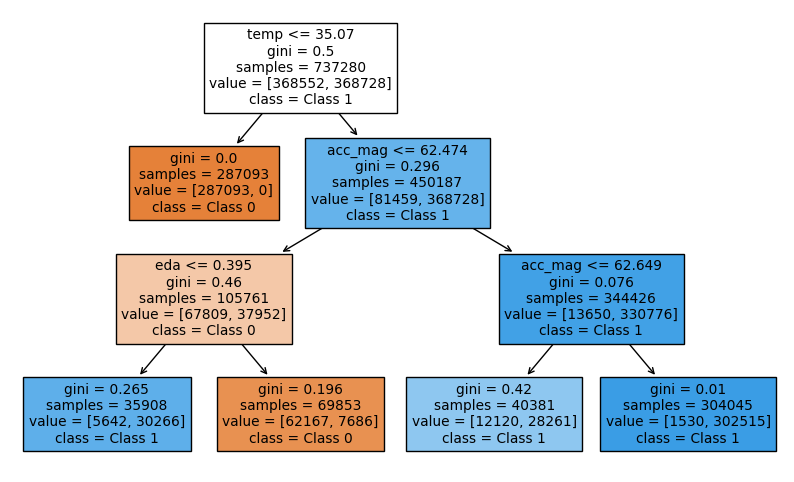

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1'])
plt.show()


In [66]:
print(classification_report(y_valid,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     92248
           1       0.95      0.98      0.96     92072

    accuracy                           0.96    184320
   macro avg       0.96      0.96      0.96    184320
weighted avg       0.96      0.96      0.96    184320



In [67]:
accuracydt = accuracy_score(y_valid, dt_pred)
print("Accuracy = ",accuracydt)

Accuracy =  0.9626302083333333


In [96]:
print(precision_score(y_valid, dt_pred))
print(recall_score(y_valid, dt_pred))
print(f1_score(y_valid, dt_pred))

0.9479878831226203
0.9788969502128769
0.9631945112372159


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
rf_pred= rf_classifier.predict(x_valid)


In [70]:
print(classification_report(y_valid,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92248
           1       1.00      1.00      1.00     92072

    accuracy                           1.00    184320
   macro avg       1.00      1.00      1.00    184320
weighted avg       1.00      1.00      1.00    184320



In [71]:
accuracyrf = accuracy_score(y_valid, rf_pred)
print("Accuracy = ",accuracyrf)

Accuracy =  0.999951171875


In [73]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    'n_estimators': [100],
    'max_depth':  [3],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [5], 'n_estimators': [100]},
             scoring='accuracy')

In [84]:
y_predrfg = grid_search.predict(x_valid)

In [97]:
accuracyrfg = accuracy_score(y_valid, y_predrfg)
print(f'Test Accuracy: {accuracyrfg:.4f}')

Test Accuracy: 0.9633


In [98]:
print(classification_report(y_valid,y_predrfg))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     92248
           1       0.95      0.98      0.96     92072

    accuracy                           0.96    184320
   macro avg       0.96      0.96      0.96    184320
weighted avg       0.96      0.96      0.96    184320



In [99]:
print(precision_score(y_valid,y_predrfg))
print(recall_score(y_valid, y_predrfg))
print(f1_score(y_valid, y_predrfg))

0.9452440844614695
0.9835889304022939
0.9640353631858803
